In [1]:
# Imports

import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn import svm

import pickle

In [2]:
full_df = pd.read_csv("../Data/dataset.csv")
to_drop = ['nameOrig','nameDest','isFlaggedFraud']
full_df.drop(columns= to_drop, inplace=True)

In [3]:
full_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [4]:
full_df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [5]:
fraud_df = full_df.loc[full_df['isFraud']==1]
fraud_df = fraud_df.reset_index(drop=True)

In [6]:
not_fraud_df = full_df.loc[full_df['isFraud']==0]
not_fraud_df = not_fraud_df.sample(n=8213, random_state=1)
not_fraud_df = not_fraud_df.reset_index(drop=True)

In [7]:
new_df = fraud_df.append(not_fraud_df, ignore_index=True)

In [8]:
new_df['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [9]:
new_df.shape

(16426, 8)

In [10]:
target = new_df["isFraud"]
target_names = ["negative", "positive"]
#might need to change to 0/1 - or replace is fraut with words instead of integers

In [11]:
data = new_df.drop("isFraud", axis=1)
feature_names = data.columns
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,TRANSFER,181.0,181.0,0.0,0.0,0.0
1,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0
2,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0
3,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0
4,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0


In [12]:
data['type'] = data['type'].replace(['CASH_OUT'], 1)
data['type'] = data['type'].replace(['CASH_IN'], 2)
data['type'] = data['type'].replace(['TRANSFER'], 3)
data['type'] = data['type'].replace(['DEBIT'], 4)
data['type'] = data['type'].replace(['PAYMENT'], 5)


In [13]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,181.0,181.0,0.0,0.0,0.0
1,1,1,181.0,181.0,0.0,21182.0,0.0
2,1,3,2806.0,2806.0,0.0,0.0,0.0
3,1,1,2806.0,2806.0,0.0,26202.0,0.0
4,1,3,20128.0,20128.0,0.0,0.0,0.0


In [14]:
#data.drop(columns= 'type', inplace=True)

In [15]:
target.shape

(16426,)

In [16]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,181.00,181.00,0.00,0.00,0.00
1,1,1,181.00,181.00,0.00,21182.00,0.00
2,1,3,2806.00,2806.00,0.00,0.00,0.00
3,1,1,2806.00,2806.00,0.00,26202.00,0.00
4,1,3,20128.00,20128.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
16421,39,2,350258.30,631.00,350889.30,804931.80,454673.49
16422,542,1,2513.85,21608.00,19094.15,9414586.35,9417100.20
16423,308,1,4390.62,41913.00,37522.38,362457.97,366848.58
16424,34,5,3855.74,796208.46,792352.73,0.00,0.00


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [18]:
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [19]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [20]:
#save
#filename = 'fraud_model2scaled.sav'
#model = pickle.load(open(filename, 'rb'))

In [21]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.772


In [22]:
# Calculate classification report
from sklearn.metrics import classification_report

predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.73      0.86      0.79      2040
    positive       0.83      0.69      0.75      2067

    accuracy                           0.77      4107
   macro avg       0.78      0.77      0.77      4107
weighted avg       0.78      0.77      0.77      4107



In [23]:
#open saved file
#pickle.dump(model, open(filename, 'wb'))

In [24]:
# Save and load temporarily
np.save('datasv.npy', (X_train_scaled, X_test_scaled, y_train, y_test))
X_train_scaled, X_test_scaled, y_train, y_test = np.load('datasv.npy', allow_pickle=True)

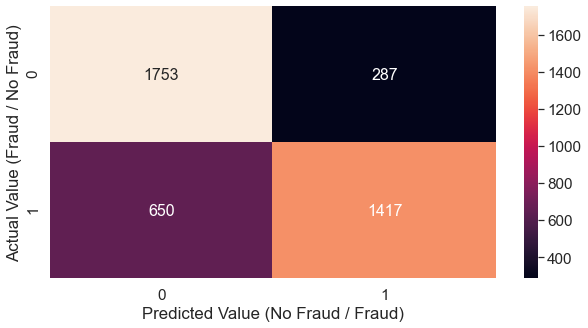

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,model.predict(X_test_scaled))
df_cm = pd.DataFrame(cm, range(2),range(2))

plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='g', annot_kws={"size": 16})# font size
plt.ylabel('Actual Value (Fraud / No Fraud)')
plt.xlabel('Predicted Value (No Fraud / Fraud)')
plt.savefig('TestConfusionMatrix.png')